In [ ]:
# Install required libraries
#!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt``
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

: 

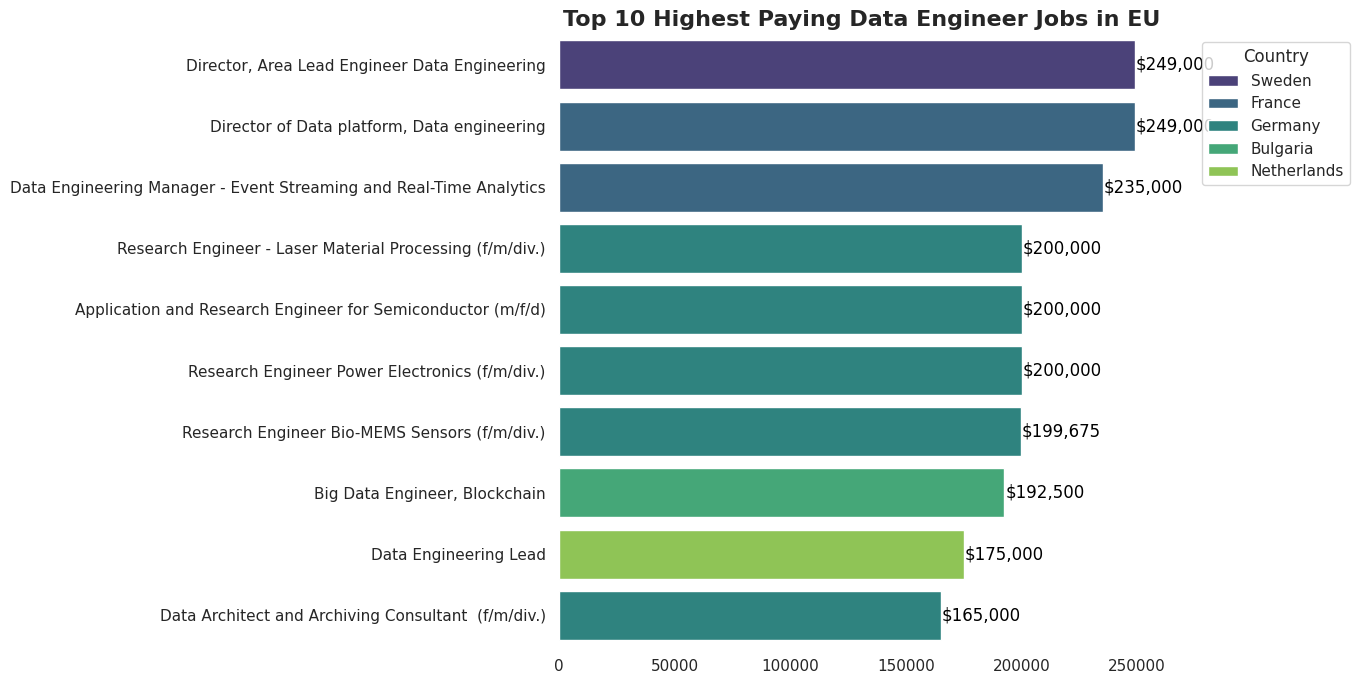

In [ ]:
#comment here
#  Load data
file_path = "/content/top_10_paying_job_EU_2023.csv"
df = pd.read_csv(file_path)

# Plot
plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    data=df,
    y='job_title',
    x='salary_year_avg',
    hue='job_country',
    dodge=False,
    palette='viridis'
)

# Remove vertical grid, x and y axis labels
sns.despine(left=True, bottom=True)
barplot.set(xlabel=None, ylabel=None)
barplot.grid(False)

# Add data labels on bars
for i, row in df.iterrows():
    barplot.text(
        row['salary_year_avg'] + 500,  # offset label a bit to the right
        i,
        f"${int(row['salary_year_avg']):,}",
        color='black',
        va='center'
    )

# Title and legend
plt.title('Top 10 Highest Paying Data Engineer Jobs in EU', fontsize=16, weight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
df = pd.read_csv("/content/top_paying_job_skills_EU_2023.csv")

# Aggregate required skills per job
skill_summary = (
    df.groupby(['job_id', 'job_title', 'company_name', 'salary_year_avg'])['skills']
    .apply(lambda x: ', '.join(sorted(set(x))))
    .reset_index()
    .sort_values(by='salary_year_avg', ascending=False)
)

# Display nicely as a styled table
styled_table = skill_summary.style.set_properties(**{
    'text-align': 'left'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left'), ('background-color', '#003399'), ('color', 'white')]
}]).set_caption("🔹 Skills Required for Top 10 Highest Paying Data Engineering Jobs in EU")

styled_table

,job_id,job_title,company_name,salary_year_avg,skills
3,371551,"Director, Area Lead Engineer Data Engineering",H&M Group,249000.000000,"azure, bash, python, spark"
8,1717028,"Director of Data platform, Data engineering",TripAdvisor,249000.000000,"airflow, aws, go, hadoop, kubernetes, nosql, snowflake, spark"
4,456144,Data Engineering Manager - Event Streaming and Real-Time Analytics,LTK,235000.000000,"aws, golang, kafka, python, r, redshift, scala, spark, sql"
5,665085,Research Engineer - Laser Material Processing (f/m/div.),Bosch Group,200000.000000,"github, python, spark"
1,173290,Research Engineer Power Electronics (f/m/div.),Bosch Group,200000.000000,"github, matlab, spark"
2,337410,Research Engineer Bio-MEMS Sensors (f/m/div.),Bosch Group,199675.000000,spark
7,1050580,"Big Data Engineer, Blockchain",Nexo,192500.000000,"aws, python"
0,43084,Data Engineering Lead,Metyis,175000.000000,"airflow, azure, databricks, github, kubernetes, pyspark, python, sql"
6,719911,Data Architect and Archiving Consultant (f/m/div.),Bosch Group,165000.000000,"sap, spark"


<ipython-input-42-b4f3cb7f1582>:41: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


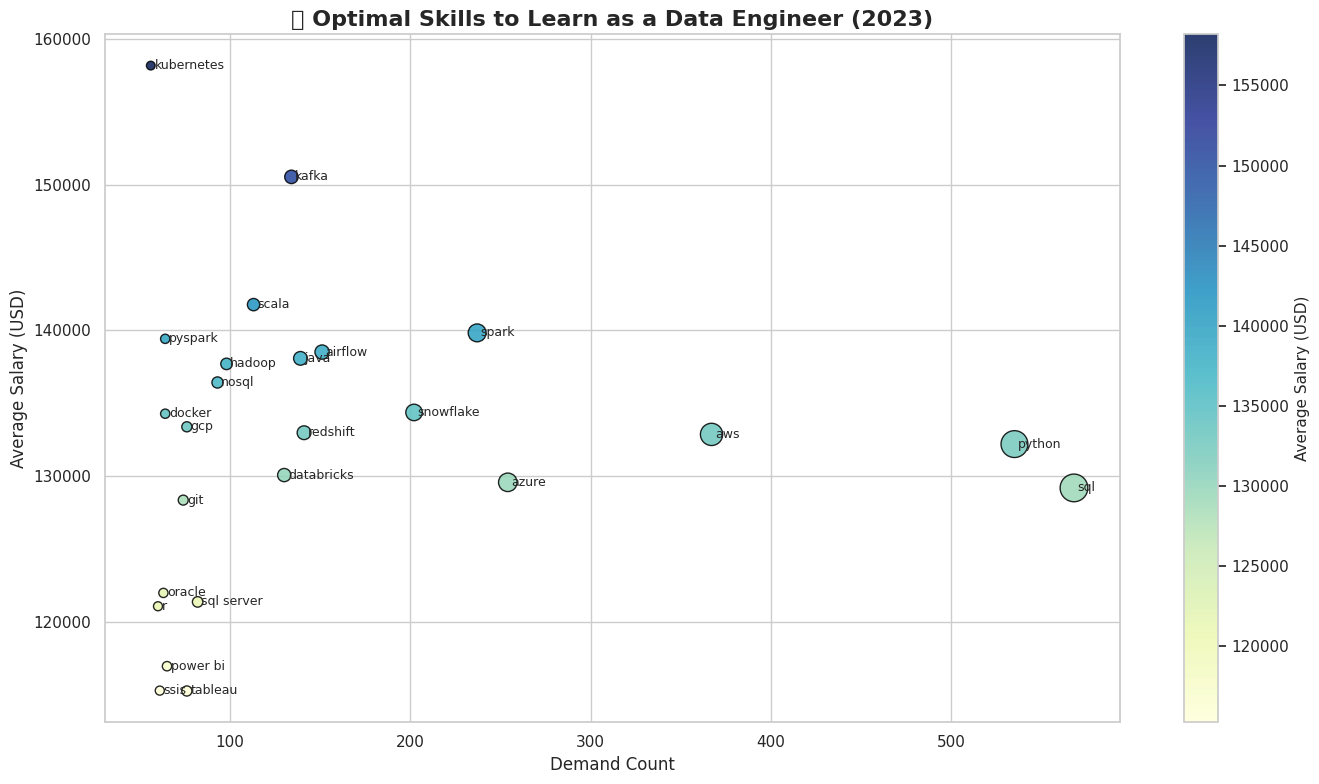

In [42]:
# Load into DataFrame
df = pd.read_csv("/content/optimal_skills_learn.csv")

# Sort by demand for easier highlighting
df = df.sort_values(by="demand_count", ascending=False)

# Plot: Salary vs. Demand (Bubble size = demand, color = salary)
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

scatter = plt.scatter(
    df["demand_count"],
    df["avg_salary"],
    s=df["demand_count"] * 0.7,  # bubble size
    c=df["avg_salary"],
    cmap="YlGnBu",
    edgecolor='black',
    alpha=0.85
)

# Annotate top skills
for _, row in df.iterrows():
    plt.text(
        row["demand_count"] + 2,
        row["avg_salary"],
        row["skills"],
        fontsize=9,
        ha='left',
        va='center'
    )

# Titles and labels
plt.title("🔹 Optimal Skills to Learn as a Data Engineer (2023)", fontsize=16, weight='bold')
plt.xlabel("Demand Count", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)

# Add color bar for salary
cbar = plt.colorbar(scatter)
cbar.set_label('Average Salary (USD)', fontsize=11)

plt.tight_layout()
plt.show()

<ipython-input-43-23a517b0b84b>:28: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


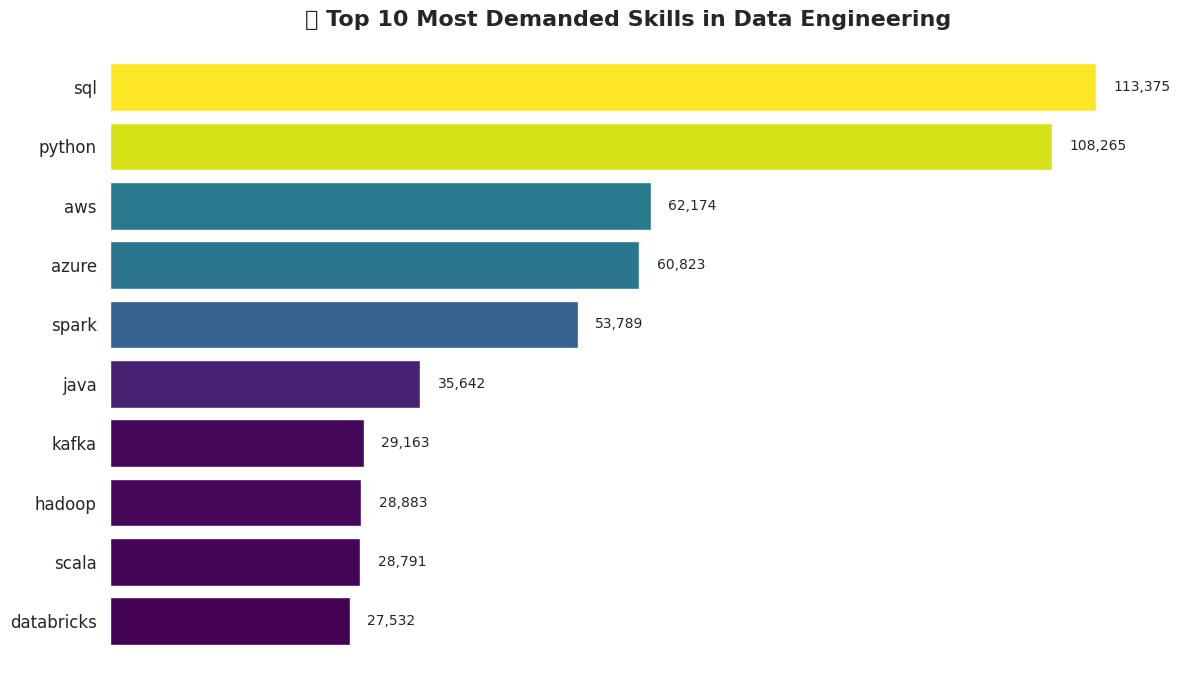

In [43]:
# Load the data
df = pd.read_csv("/content/to_demanded_skills_data_engineer_2023.csv")
df = df.sort_values(by="demand_count", ascending=True)  # for horizontal bars

# Normalize demand_count for color mapping
norm = plt.Normalize(df["demand_count"].min(), df["demand_count"].max())
colors = cm.viridis(norm(df["demand_count"].values))

# Plotting
plt.figure(figsize=(12, 7))
bars = plt.barh(df["skills"], df["demand_count"], color=colors)

# Remove axes and grid
plt.xticks([])
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.grid(False)

# Add data labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2000, bar.get_y() + bar.get_height() / 2,
             f"{int(width):,}", va='center', fontsize=10)

# Title
plt.title("🔹 Top 10 Most Demanded Skills in Data Engineering", fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

In [44]:
# Load into DataFrame
df = pd.read_csv("/content/top_skills_salary_work_home.csv")

# Format salaries for readability
df["avg_salary"] = df["avg_salary"].map("${:,.0f}".format)

# Create styled table
styled_table = df.style.set_properties(**{
    'text-align': 'left'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#003399'), ('color', 'white'), ('text-align', 'left')]
}]).set_caption("🔹 Top-Paying Skills for Remote Data Engineering Jobs")

styled_table

,skills,avg_salary
0,assembly,"$192,500"
1,mongo,"$182,223"
2,ggplot2,"$176,250"
3,rust,"$172,819"
4,clojure,"$170,866"
5,perl,"$169,000"
6,neo4j,"$166,559"
7,solidity,"$166,250"
8,graphql,"$162,547"
9,julia,"$160,500"
